# Vehicle Characteristics 

## How does vehicle age impact the probability of a claim? 
 * Older vehicles may have higher claim rates; 
plot claim rate vs. vehicle age.

In [3]:
import pandas as pd
df = pd.read_csv("data/cleaned_data.csv")
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [4]:
df["vehicle_age"]

0        1.2
1        1.8
2        0.2
3        0.4
4        1.0
        ... 
58587    2.6
58588    2.2
58589    2.2
58590    3.6
58591    0.4
Name: vehicle_age, Length: 58592, dtype: float64

In [5]:
df["claim_status"]

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: claim_status, Length: 58592, dtype: int64

In [6]:
age_claim_rate = (
    df.groupby(df["vehicle_age"].round().astype("Int64"))["claim_status"]
      .agg(claim_rate="mean", number_cars="count")
      .reset_index()
      .sort_values("vehicle_age")
)

age_claim_rate

,vehicle_age,claim_rate,number_cars
0,0,0.069431,16808
1,1,0.066319,17461
2,2,0.065085,13444
3,3,0.052358,8652
4,4,0.045480,1803
5,5,0.027559,254
6,6,0.025641,117
7,7,0.100000,30
8,8,0.000000,10
9,9,0.000000,5


In [9]:
if "age_group" in df.columns:
    df = df.drop(columns=["age_group"])

# create labels
label_0_2 = (df["vehicle_age"] <= 2) & (df["vehicle_age"] >= 0)
label_3_5 = (df["vehicle_age"] > 2) & (df["vehicle_age"] <= 5)
label_6_8 = (df["vehicle_age"] > 5) & (df["vehicle_age"] <= 8)
label_9plus = (df["vehicle_age"] > 8)

# label asigned 
df.loc[label_0_2, "age_group"] = "0–2"
df.loc[label_3_5, "age_group"] = "3–5"
df.loc[label_6_8, "age_group"] = "6–8"
df.loc[label_9plus, "age_group"] = "9+"

# see the result
print(df["age_group"].value_counts(dropna=False))

age_group
0–2    42765
3–5    15604
6–8      209
9+        14
Name: count, dtype: int64


In [10]:
age_group_rate = (
    df.groupby("age_group", observed=True)["claim_status"]
      .agg(claim_rate="mean", n="count")
      .reset_index()
)
age_group_rate

,age_group,claim_rate,n
0,0–2,0.067368,42765
1,3–5,0.055114,15604
2,6–8,0.033493,209
3,9+,0.000000,14


<Axes: xlabel='age_group', ylabel='claim_rate'>

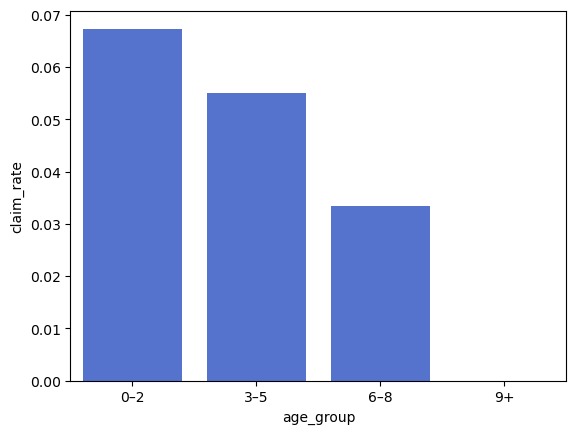

In [11]:
sns.barplot(
    data=age_group_rate,
    x="age_group",
    y="claim_rate",
    color="royalblue"
)


## Do certain vehicle models have higher claim rates?
 → Rank models by average claim rate; highlight top risky models.

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [13]:
#### how many vehicles have claims 
df['claim_status'].value_counts(normalize=True) * 100



claim_status
0    93.603222
1     6.396778
Name: proportion, dtype: float64

In [15]:
claim_rate_by_model = (
    df.groupby('model')['claim_status']
    .mean()
    .sort_values(ascending=False)
)

claim_rate_by_model

model
M2     0.074074
M5     0.072591
M7     0.068367
M6     0.068162
M4     0.064275
M9     0.062914
M1     0.061413
M10    0.060380
M8     0.058471
M3     0.053940
M11    0.041322
Name: claim_status, dtype: float64

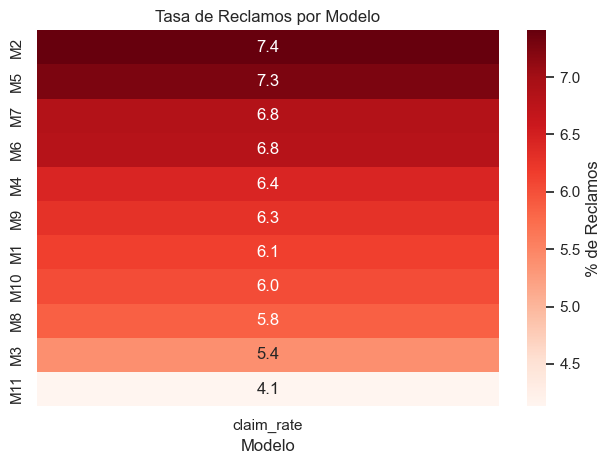

In [27]:
import pandas as pd

# Convertir la serie a DataFrame 2D
df_heat = claim_rate_by_model.to_frame('claim_rate') * 100

sns.heatmap(
    df_heat,
    cmap='Reds',
    annot=True,
    fmt=".1f",
    cbar_kws={'label': '% of claims'}
)
plt.title('claims by models')
plt.xlabel('Model')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Are vehicles with more safety features (airbags, ESC, TPMS, parking sensors, cameras) less likely to file claims?
 → Create a “safety score”; compare average claim rate across safety levels.

In [30]:
safety_features = ['airbags', 'is_esc', 'is_tpms', 'is_parking_sensors', 'is_parking_camera']
for col in safety_features[1:]:  # excepto 'airbags', que ya es numérica
    df[col] = df[col].map({'Yes': 1, 'No': 0})
safety_features

['airbags', 'is_esc', 'is_tpms', 'is_parking_sensors', 'is_parking_camera']

In [32]:
df['safety_score'] = df[safety_features].sum(axis=1)
df['safety_score']

0        6.0
1        2.0
2        6.0
3        2.0
4        2.0
        ... 
58587    2.0
58588    6.0
58589    2.0
58590    2.0
58591    2.0
Name: safety_score, Length: 58592, dtype: float64

In [33]:
claim_rate_by_safety = (
    df.groupby('safety_score')['claim_status']
    .mean()
    .reset_index()
)
claim_rate_by_safety

,safety_score,claim_status
0,1.0,0.060380
1,2.0,0.063649
2,6.0,0.064984


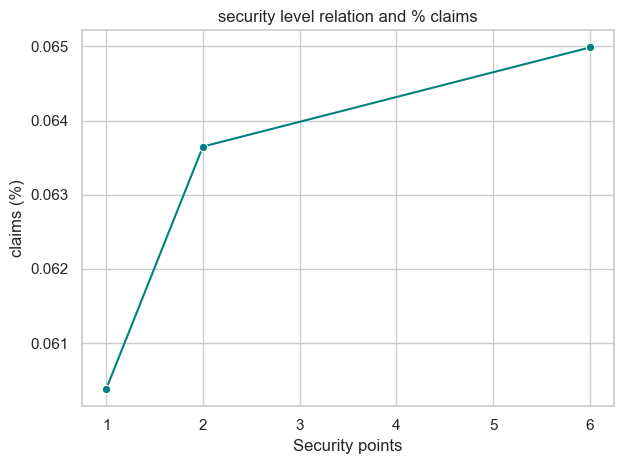

In [34]:
sns.lineplot(
    x='safety_score',
    y='claim_status',
    data=claim_rate_by_safety,
    marker='o',
    color='teal'
)
plt.title('security level relation and % claims')
plt.xlabel('Security points')
plt.ylabel('claims (%)')
plt.tight_layout()
plt.show()

## How do different fuel types affect claim likelihood?
 → Compare claim rate by fuel type (gasoline, diesel, hybrid, electric).

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Average claim rate by fuel type
claim_rate_by_fuel = (
    df.groupby('fuel_type')['claim_status']
    .mean()
    .reset_index()
    .sort_values('claim_status', ascending=False)
)
claim_rate_by_fuel

,fuel_type,claim_status
2,Petrol,0.066384
1,Diesel,0.064862
0,CNG,0.060748
